In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from dateutil import parser
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as ss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [24]:
df = pd.read_csv("E:\\Directing-Customers-to-Subscription-Through-App-Behavior-Analysis-master\\appdata10.csv")

In [25]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [26]:
df.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [27]:
df.hour = df.hour.str.slice(1,3).astype(int)

In [28]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [29]:
df2 = df.copy()

In [30]:
df2 = df2.drop(columns = ["user", "screen_list", "enrolled_date", "first_open", "enrolled"])

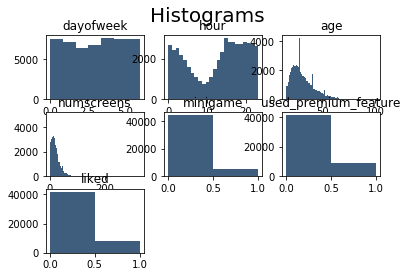

In [31]:
plt.suptitle("Histograms", fontsize = 20)
for i in range(1, df2.shape[1]+1):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title(df2.columns.values[i-1])

    vals = np.size(df2.iloc[:,i-1].unique())

    plt.hist(df2.iloc[:,i-1], bins = vals, color = "#3F5D7D")

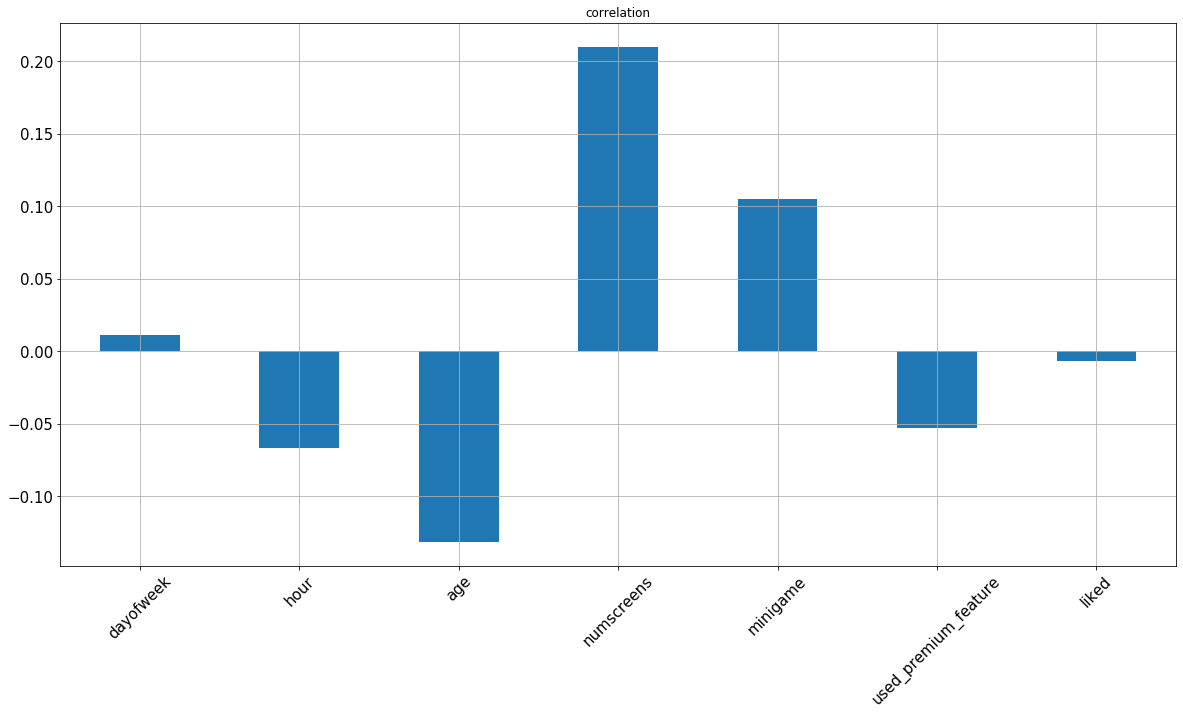

In [32]:
df2.corrwith(df.enrolled).plot.bar(figsize = (20,10), title = "correlation",
                                fontsize = 15, rot = 45, grid = True)

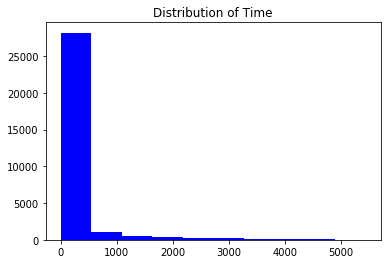

In [33]:
#Feature Engg
df["first_open"] = [parser.parse(row_data) for row_data in df["first_open"]]
df["enrolled_date"] = [parser.parse(row_data) if isinstance(row_data, str) else row_data  for row_data in df["enrolled_date"]]

df["difference"] = (df.enrolled_date - df.first_open).astype("timedelta64[h]")

plt.hist(df["difference"].dropna(), color = "blue")
plt.title("Distribution of Time")
plt.show()
df.loc[df.difference > 48, "enrolled"] = 0
df = df.drop(columns = ["difference", "enrolled_date", "first_open"])

In [35]:
top_screens = pd.read_csv("E:\\Directing-Customers-to-Subscription-Through-App-Behavior-Analysis-master\\top_screens.csv").top_screens.values
df["screen_list"] = df.screen_list.astype(str) + ","

for sc in top_screens:
    df[sc] = df.screen_list.str.contains(sc).astype(int)
    df["screen_list"] = df.screen_list.str.replace(sc+",", "")

df["Other"] = df.screen_list.str.count(",")
df = df.drop(columns = ["screen_list"])

In [36]:
savings_screens = ["Saving1",
                  "Saving2",
                  "Saving2Amount",
                  "Saving4",
                  "Saving5",
                  "Saving6",
                  "Saving7",
                  "Saving8",
                  "Saving9",
                  "Saving10"]
df["SavingsCount"] = df[savings_screens].sum(axis = 1)
df = df.drop(columns = savings_screens)

In [37]:
cm_screens = ["Credit1",
             "Credit2",
             "Credit3",
             "Credit3Container",
             "Credit3Dashboard"]
df["CMCount"] = df[cm_screens].sum(axis = 1)
df = df.drop(columns = cm_screens)

In [38]:
cc_screens = ["CC1",
             "CC1Category",
             "CC3"]
df["CCCount"] = df[cc_screens].sum(axis = 1)
df = df.drop(columns = cc_screens)

In [39]:
loan_screens = ["Loan",
                "Loan2",
                "Loan3",
                "Loan4"]
df["LoanCount"] = df[loan_screens].sum(axis = 1)
df = df.drop(columns = loan_screens)

In [40]:
data = pd.read_csv("E:\\Directing-Customers-to-Subscription-Through-App-Behavior-Analysis-master\\new_appdata10.csv")
data = data.drop(columns = "hour")

In [41]:
y = data["enrolled"]
x = data.drop(columns = ["enrolled"])
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size = 0.25, random_state  = 0)

train_identifier = x_train["user"]
x_train = x_train.drop(columns = "user")
test_identifier = x_test["user"]
x_test = x_test.drop(columns = "user")

In [45]:
sc_x = ss()
x_train2 = pd.DataFrame(sc_x.fit_transform(x_train))
x_test2 = pd.DataFrame(sc_x.fit_transform(x_test))
x_train2.columns = x_train.columns
x_test2.columns = x_test.columns
x_train = x_train2
x_test = x_test2

In [46]:
LR = LogisticRegression(random_state = 0, penalty = "l1")
LR.fit(x_train, y_train)

y_pred = LR.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

result = pd.DataFrame([["Logistic Regression", acc, prec, rec, f1]],
             columns  = ["Model", "Accuracy", "precision", "Recall", "F1 score"])

print(result)

C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


                 Model  Accuracy  precision    Recall  F1 score
0  Logistic Regression    0.7696   0.767378  0.769602  0.768489
